<a href="https://colab.research.google.com/github/boxed-mikann/transformer_brain_encoder/blob/main/my_colab_file/algonauts_2023_challenge_tutorial_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
platform = 'colab' #@param ['colab', 'jupyter_notebook'] {allow-input: true}

In [ ]:
if platform == 'colab':
    !pip install matplotlib==3.5.2
    !pip install nilearn==0.9.2

In [ ]:
!pip install nilearn==0.9.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 54.6 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import matplotlib
#matplotlib.use('Agg') # Force a non-interactive backend to potentially resolve conflicts
from matplotlib import pyplot as plt
#from nilearn import datasets
#from nilearn import plotting
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names
from torchvision import transforms
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as corr

In [3]:
if platform == 'colab':
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    data_dir = '/content/drive/MyDrive/algonauts_2023_tutorial_data' #@param {type:"string"}
    parent_submission_dir = '/content/drive/MyDrive/algonauts_2023_challenge_submission' #@param {type:"string"}
    result_dir = '/content/drive/MyDrive/algonauts_2023/transformer_brain_encoder_results' #@param {type:"string"}

Mounted at /content/drive/


In [4]:
device = 'cuda' #@param ['cpu', 'cuda'] {allow-input: true}
device = torch.device(device)

In [5]:
!pip install open_clip_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.3 MB/s eta 0:00:00


In [19]:
!cd /content/ && mkdir -p /content/myrepo2

In [20]:
REPO_DIR = '/content/myrepo2/transformer_brain_encoder'
if not os.path.exists(REPO_DIR):
    !cd /content/myrepo2/ && git clone -b copilot/optimize-memory-usage https://github.com/boxed-mikann/transformer_brain_encoder.git
#!python main.py --run 1  --subj 1 --enc_output_layer 1 --readout_res 'rois_all'

Cloning into 'transformer_brain_encoder'...
remote: Enumerating objects: 317, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 317 (delta 38), reused 41 (delta 13), pack-reused 231 (from 1)
Receiving objects: 100% (317/317), 51.85 MiB | 42.21 MiB/s, done.
Resolving deltas: 100% (176/176), done.


In [21]:
import os
if os.path.exists(REPO_DIR):
    !cd "{REPO_DIR}" && git pull
else:
    print(f"Repository directory not found: {REPO_DIR}")

Already up to date.


In [ ]:
class argObj:
  def __init__(self, data_dir, parent_submission_dir, subj):

    self.subj = format(subj, '02')
    self.data_dir = os.path.join(data_dir, 'subj'+self.subj)
    self.parent_submission_dir = parent_submission_dir
    self.subject_submission_dir = os.path.join(self.parent_submission_dir,
        'subj'+self.subj)

    # Create the submission directory if not existing
    if not os.path.isdir(self.subject_submission_dir):
        os.makedirs(self.subject_submission_dir)

args = argObj(data_dir, result_dir, 1)

In [ ]:
args.data_dir

'/content/drive/MyDrive/algonauts_2023_tutorial_data/subj01'

In [ ]:
extracted_data=os.path.join(result_dir,'dino_v2')

In [8]:
data_dir = '/content/drive/MyDrive/algonauts_2023_tutorial_data/subj01'

In [10]:
# セル3: メモリ最適化の実装を検証
!cd /content/myrepo2/transformer_brain_encoder && python validate_memory_changes.py

Memory Optimization Validation


Checking Python syntax
Traceback (most recent call last):
  File "/content/myrepo/transformer_brain_encoder/validate_memory_changes.py", line 149, in <module>
    sys.exit(main())
             ^^^^^^
  File "/content/myrepo/transformer_brain_encoder/validate_memory_changes.py", line 114, in main
    syntax_valid = check_code_syntax()
                   ^^^^^^^^^^^^^^^^^^^
  File "/content/myrepo/transformer_brain_encoder/validate_memory_changes.py", line 100, in check_code_syntax
    with open(filepath, 'r') as f:
         ^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/home/runner/work/transformer_brain_encoder/transformer_brain_encoder/extract_features.py'


In [22]:
# 特徴抽出
!cd /content/myrepo2/transformer_brain_encoder && python extract_features.py --data_dir $data_dir --output_dir /content/outofdrive/algonauts_2023/feature_extraction/dinov2_q_11_20_2 --subj 01 --backbone dinov2_q --batch_size 32 --device cuda


Feature Extraction Configuration
Data directory: /content/drive/MyDrive/algonauts_2023_tutorial_data/subj01
Output directory: /content/outofdrive/algonauts_2023/feature_extraction/dinov2_q_11_20_2
Subject: 01
Backbone: dinov2_q
Batch size: 32
Device: cuda
Encoder layer: -1

Extracting TRAINING features
🔧 Extracting DINO features (with hooks) from /content/drive/MyDrive/algonauts_2023_tutorial_data/subj01/training_split/training_images
Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not ava

In [15]:
# 特徴抽出
!cd /content/myrepo/transformer_brain_encoder && python extract_features.py --data_dir $data_dir --output_dir /content/outofdrive/algonauts_2023/feature_extraction/dinov2_q_11_20 --subj 01 --backbone dinov2_q --batch_size 32 --device cuda


Feature Extraction Configuration
Data directory: /content/drive/MyDrive/algonauts_2023_tutorial_data/subj01
Output directory: /content/outofdrive/algonauts_2023/feature_extraction/dinov2_q_11_20
Subject: 01
Backbone: dinov2_q
Batch size: 32
Device: cuda
Encoder layer: -1

Extracting TRAINING features
🔧 Extracting DINO features (with hooks) from /content/drive/MyDrive/algonauts_2023_tutorial_data/subj01/training_split/training_images
Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not avail

圧縮してGoogleDriveに保存

In [24]:
result_dir='/content/drive/MyDrive/algonauts_2023/feature_extraction'

In [ ]:
import os

input_file_path = '/content/outofdrive/algonauts_2023/feature_extraction/dinov2_q_11_20_2/dinov2_q_last/01/train.npy'
output_dir_drive = os.path.join(result_dir, 'compressed_features')
os.makedirs(output_dir_drive, exist_ok=True)
compressed_file_name = 'train_features.npy.gz'
output_file_path_drive = os.path.join(output_dir_drive, compressed_file_name)

try:
    if not os.path.exists(input_file_path):
        print(f"Error: The input file {input_file_path} does not exist. Please ensure the feature extraction step completed successfully.")
    else:
        print(f"Compressing {input_file_path} using gzip...")
        # Use gzip command to compress the file on disk, keeping the original
        # The -k option keeps the original file. If you want to replace it, remove -k.
        !gzip -k "{input_file_path}"

        temp_compressed_path = input_file_path + '.gz'

        if os.path.exists(temp_compressed_path):
            print(f"Moving compressed file from {temp_compressed_path} to {output_file_path_drive}")
            !mv "{temp_compressed_path}" "{output_file_path_drive}"
            print("File compressed and moved successfully to Google Drive.")
            print(f"Original file size: {os.path.getsize(input_file_path) / (1024**3):.2f} GB")
            print(f"Compressed file size: {os.path.getsize(output_file_path_drive) / (1024**3):.2f} GB")
        else:
            print("Error: Gzip compression failed or did not create the expected file.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Compressing /content/outofdrive/algonauts_2023/feature_extraction/dinov2_q_11_20_2/dinov2_q_last/01/train.npy using gzip...


In [ ]:
!python extract_features_correct.py \
  --data_dir $args.data_dir \
  --output_dir $extracted_data \
  --subj '01' \
  --batch_size 16 \
  --device 'cuda' \
  --enc_layer -1

In [ ]:
!cd /content/transformer_brain_encoder && python main.py \
  --run 1  \
  --subj $args.subj \
  --enc_output_layer 1 \
  --readout_res 'rois_all' \
  --data_dir $data_dir \
  --output_path $args.subject_submission_dir
  --save_model 1 \

cuda
roi_name_maps: [{0: 'Unknown', 1: 'V1v', 2: 'V1d', 3: 'V2v', 4: 'V2d', 5: 'V3v', 6: 'V3d', 7: 'hV4'}, {0: 'Unknown', 1: 'EBA', 2: 'FBA-1', 3: 'FBA-2', 4: 'mTL-bodies'}, {0: 'Unknown', 1: 'OFA', 2: 'FFA-1', 3: 'FFA-2', 4: 'mTL-faces', 5: 'aTL-faces'}, {0: 'Unknown', 1: 'OPA', 2: 'PPA', 3: 'RSC'}, {0: 'Unknown', 1: 'OWFA', 2: 'VWFA-1', 3: 'VWFA-2', 4: 'mfs-words', 5: 'mTL-words'}, {0: 'Unknown', 1: 'early', 2: 'midventral', 3: 'midlateral', 4: 'midparietal', 5: 'ventral', 6: 'lateral', 7: 'parietal'}]
lh_challenge_rois: 6
lh_challenge_rois_s: torch.Size([25, 19004])
Training stimulus images: 8857
Validation stimulus images: 984

Test stimulus images: 159
Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitb14/dinov2_vitb14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vitb14_pretrain.pth
100% 330M/330M [00:01<00:00, 295MB/s]
Number of model parameters: 368

In [ ]:
#!cd /content/transformer_brain_encoder && python main.py \
  --subj args.subj \
  --run 1 \
  --data_dir '/content/drive/MyDrive/algonauts_2023_tutorial_data' \
  --dataset 'nsd_algo' \
  --backbone_arch 'dinov2_q' \
  --encoder_arch 'spatial_feature' \
  --readout_res 'rois_all' \
  --epochs 2 \
  --batch_size 8 \
  --image_size 224 \
  --output_path './results/' \
  --save_model 0 \
  --enc_output_layer 1 \
  --lr 0.0005 \
  --lr_drop 10

cpu
roi_name_maps: [{0: 'Unknown', 1: 'V1v', 2: 'V1d', 3: 'V2v', 4: 'V2d', 5: 'V3v', 6: 'V3d', 7: 'hV4'}, {0: 'Unknown', 1: 'EBA', 2: 'FBA-1', 3: 'FBA-2', 4: 'mTL-bodies'}, {0: 'Unknown', 1: 'OFA', 2: 'FFA-1', 3: 'FFA-2', 4: 'mTL-faces', 5: 'aTL-faces'}, {0: 'Unknown', 1: 'OPA', 2: 'PPA', 3: 'RSC'}, {0: 'Unknown', 1: 'OWFA', 2: 'VWFA-1', 3: 'VWFA-2', 4: 'mfs-words', 5: 'mTL-words'}, {0: 'Unknown', 1: 'early', 2: 'midventral', 3: 'midlateral', 4: 'midparietal', 5: 'ventral', 6: 'lateral', 7: 'parietal'}]
lh_challenge_rois: 6
lh_challenge_rois_s: torch.Size([25, 19004])
Traceback (most recent call last):
  File "/content/transformer_brain_encoder/main.py", line 491, in <module>
    main(0, 1, args)
  File "/content/transformer_brain_encoder/main.py", line 258, in main
    train_loader, val_loader = fetch_dataloaders(args, train='train')
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/transformer_brain_encoder/datasets/nsd.py", line 251, in fetch_dat

# 結果確認

In [ ]:
!pip install nilearn==0.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.1 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import matplotlib
#matplotlib.use('Agg') # Force a non-interactive backend to potentially resolve conflicts
from matplotlib import pyplot as plt
from nilearn import datasets
from nilearn import plotting
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names
from torchvision import transforms
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as corr

AttributeError: module 'matplotlib.cm' has no attribute 'register_cmap'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
subject_submission_dir = '/content/drive/MyDrive/algonauts_2023/transformer_brain_encoder_results/subj01nsd_test/dinov2_q_transformer/subj_01/rois_all/enc_1/run_1'

In [ ]:
#参考コード
# Fit linear regressions on the training data
reg_lh = LinearRegression().fit(features_train, lh_fmri_train)
reg_rh = LinearRegression().fit(features_train, rh_fmri_train)
# Use fitted linear regressions to predict the validation and test fMRI data
lh_fmri_val_pred = reg_lh.predict(features_val)
lh_fmri_test_pred = reg_lh.predict(features_test)
rh_fmri_val_pred = reg_rh.predict(features_val)
rh_fmri_test_pred = reg_rh.predict(features_test)

In [ ]:
lh_fmri_val_pred = np.load(os.path.join(subject_submission_dir, 'lh_fmri_val_pred.npy'))
lh_fmri_test_pred = np.load(os.path.join(subject_submission_dir, 'lh_fmri_val_pred.npy'))
rh_fmri_val_pred = np.load(os.path.join(subject_submission_dir, 'lh_fmri_val_pred.npy'))
rh_fmri_test_pred = np.load(os.path.join(subject_submission_dir, 'lh_fmri_val_pred.npy'))

In [ ]:
data_dir = '/content/drive/MyDrive/algonauts_2023_tutorial_data/subj01' #@param {type:"string"}

In [ ]:
fmri_dir = os.path.join(data_dir, 'training_split', 'training_fmri')
lh_fmri = np.load(os.path.join(fmri_dir, 'lh_training_fmri.npy'))
rh_fmri = np.load(os.path.join(fmri_dir, 'rh_training_fmri.npy'))

In [ ]:
lh_fmri_train = lh_fmri[idxs_train]
lh_fmri_val = lh_fmri[idxs_val]
rh_fmri_train = rh_fmri[idxs_train]
rh_fmri_val = rh_fmri[idxs_val]

In [ ]:
# Empty correlation array of shape: (LH vertices)
lh_correlation = np.zeros(lh_fmri_val_pred.shape[1])
# Correlate each predicted LH vertex with the corresponding ground truth vertex
for v in tqdm(range(lh_fmri_val_pred.shape[1])):
    lh_correlation[v] = corr(lh_fmri_val_pred[:,v], lh_fmri_val[:,v])[0]

# Empty correlation array of shape: (RH vertices)
rh_correlation = np.zeros(rh_fmri_val_pred.shape[1])
# Correlate each predicted RH vertex with the corresponding ground truth vertex
for v in tqdm(range(rh_fmri_val_pred.shape[1])):
    rh_correlation[v] = corr(rh_fmri_val_pred[:,v], rh_fmri_val[:,v])[0]

In [ ]:
lh_correlation = np.load(os.path.join(subject_submission_dir, 'lh_val_corr.npy'))
rh_correlation = np.load(os.path.join(subject_submission_dir, 'rh_val_corr.npy'))

In [ ]:
hemisphere = 'left' #@param ['left', 'right'] {allow-input: true}

# Load the brain surface map of all vertices
roi_dir = os.path.join(data_dir, 'roi_masks',
    hemisphere[0]+'h.all-vertices_fsaverage_space.npy')
fsaverage_all_vertices = np.load(roi_dir)

# Map the correlation results onto the brain surface map
fsaverage_correlation = np.zeros(len(fsaverage_all_vertices))
if hemisphere == 'left':
    fsaverage_correlation[np.where(fsaverage_all_vertices)[0]] = lh_correlation
elif hemisphere == 'right':
    fsaverage_correlation[np.where(fsaverage_all_vertices)[0]] = rh_correlation

# Create the interactive brain surface map
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')
view = plotting.view_surf(
    surf_mesh=fsaverage['infl_'+hemisphere],
    surf_map=fsaverage_correlation,
    bg_map=fsaverage['sulc_'+hemisphere],
    threshold=1e-14,
    cmap='cold_hot',
    colorbar=True,
    title='Encoding accuracy, '+hemisphere+' hemisphere'
    )
view

NameError: name 'datasets' is not defined

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


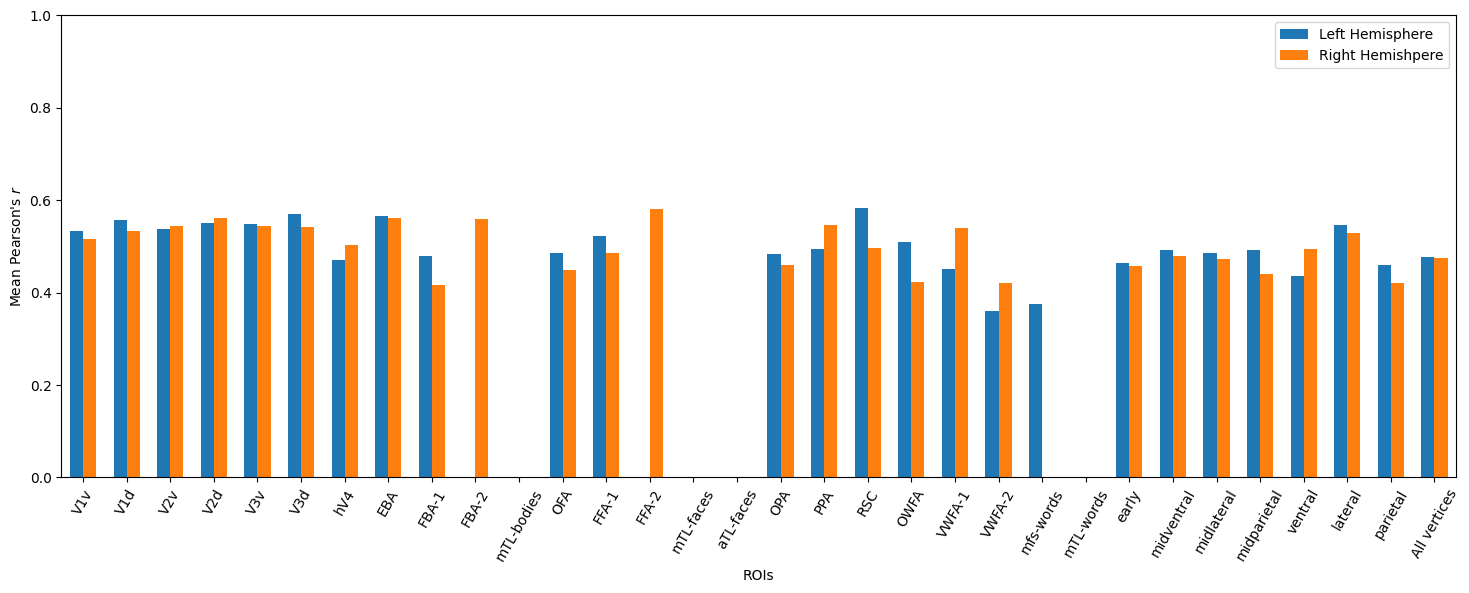

In [ ]:
# Load the ROI classes mapping dictionaries
roi_mapping_files = ['mapping_prf-visualrois.npy', 'mapping_floc-bodies.npy',
    'mapping_floc-faces.npy', 'mapping_floc-places.npy',
    'mapping_floc-words.npy', 'mapping_streams.npy']
roi_name_maps = []
for r in roi_mapping_files:
    roi_name_maps.append(np.load(os.path.join(data_dir, 'roi_masks', r),
        allow_pickle=True).item())

# Load the ROI brain surface maps
lh_challenge_roi_files = ['lh.prf-visualrois_challenge_space.npy',
    'lh.floc-bodies_challenge_space.npy', 'lh.floc-faces_challenge_space.npy',
    'lh.floc-places_challenge_space.npy', 'lh.floc-words_challenge_space.npy',
    'lh.streams_challenge_space.npy']
rh_challenge_roi_files = ['rh.prf-visualrois_challenge_space.npy',
    'rh.floc-bodies_challenge_space.npy', 'rh.floc-faces_challenge_space.npy',
    'rh.floc-places_challenge_space.npy', 'rh.floc-words_challenge_space.npy',
    'rh.streams_challenge_space.npy']
lh_challenge_rois = []
rh_challenge_rois = []
for r in range(len(lh_challenge_roi_files)):
    lh_challenge_rois.append(np.load(os.path.join(data_dir, 'roi_masks',
        lh_challenge_roi_files[r])))
    rh_challenge_rois.append(np.load(os.path.join(data_dir, 'roi_masks',
        rh_challenge_roi_files[r])))

# Select the correlation results vertices of each ROI
roi_names = []
lh_roi_correlation = []
rh_roi_correlation = []
for r1 in range(len(lh_challenge_rois)):
    for r2 in roi_name_maps[r1].items():
        if r2[0] != 0: # zeros indicate to vertices falling outside the ROI of interest
            roi_names.append(r2[1])
            lh_roi_idx = np.where(lh_challenge_rois[r1] == r2[0])[0]
            rh_roi_idx = np.where(rh_challenge_rois[r1] == r2[0])[0]
            lh_roi_correlation.append(lh_correlation[lh_roi_idx])
            rh_roi_correlation.append(rh_correlation[rh_roi_idx])
roi_names.append('All vertices')
lh_roi_correlation.append(lh_correlation)
rh_roi_correlation.append(rh_correlation)

# Create the plot
lh_mean_roi_correlation = [np.mean(lh_roi_correlation[r])
    for r in range(len(lh_roi_correlation))]
rh_mean_roi_correlation = [np.mean(rh_roi_correlation[r])
    for r in range(len(rh_roi_correlation))]
plt.figure(figsize=(18,6))
x = np.arange(len(roi_names))
width = 0.30
plt.bar(x - width/2, lh_mean_roi_correlation, width, label='Left Hemisphere')
plt.bar(x + width/2, rh_mean_roi_correlation, width,
    label='Right Hemishpere')
plt.xlim(left=min(x)-.5, right=max(x)+.5)
plt.ylim(bottom=0, top=1)
plt.xlabel('ROIs')
plt.xticks(ticks=x, labels=roi_names, rotation=60)
plt.ylabel('Mean Pearson\'s $r$')
plt.legend(frameon=True, loc=1);
plt.show()